# Classificação e agrupamento de empresas com machine learning





Classificação de empresas com machine learning
* Esta base de dados foi criada com as informações disponibizadas no site www.bastter.com

In [ ]:
import pandas as pd
import numpy as np

# 1. Carregar o dataset
dataset = pd.read_excel('/content/drive/MyDrive/BD_Resultado_Clasificacao.xlsx')

# 2. Definir os pesos fornecidos para cada coluna
pesos = {
    'LPA descontado': 0.1171,
    'Valor de M.': 0.0894,
    'Luc. Liquido': 0.0878,
    'P/VPA': 0.0786,
    'VPA': 0.0739,
    'Margem segurança': 0.0662,
    'Pes. Fisicas': 0.0647,
    'EM': 0.0632,
    'P/L descontado': 0.0616,
    'Divida Liquida': 0.0586,
    'EV': 0.0586,
    'Divida Bruta/PL': 0.0554
}

# 3. Selecionar as colunas numéricas relevantes com base nos pesos
numerical_columns = list(pesos.keys())
data = dataset[numerical_columns]

# 4. Substituir valores faltantes apenas nas colunas numéricas com a média da coluna
data = data.fillna(data.mean())

# 5. Adicionar uma constante positiva para garantir que todos os valores sejam positivos
# Encontrar o menor valor do DataFrame
min_value = data.min().min()
if min_value <= 0:
    data += (1 - min_value)  # Adicionar 1 - valor mínimo para garantir que todos os valores sejam positivos

# 6. Separar métricas "Quanto Maior, Melhor" e "Quanto Menor, Melhor"
maior_melhor = ["LPA descontado", "Valor de M.", "Luc. Liquido", "VPA", "Margem segurança", "Pes. Fisicas"]
menor_melhor = ["P/VPA", "EM", "P/L descontado", "Divida Liquida", "EV", "Divida Bruta/PL"]

# 7. Aplicar o escalonamento logarítmico nas colunas "Quanto Maior, Melhor"
data_log_scaled = np.log1p(data[maior_melhor])

# 8. Aplicar inversão e logarítmo nas colunas "Quanto Menor, Melhor"
data_log_scaled_menor_melhor = np.log1p(1 / data[menor_melhor])

# 9. Substituir os valores da tabela original pelas transformações aplicadas e multiplicar pelos pesos correspondentes
for col in maior_melhor:
    data_log_scaled[col] = data_log_scaled[col] * pesos[col]

for col in menor_melhor:
    data_log_scaled[col] = data_log_scaled_menor_melhor[col] * pesos[col]

# 10. Criar uma nova coluna 'Score' somando os valores ponderados
dataset['Score'] = data_log_scaled.sum(axis=1)

# 11. Definir uma heurística para classificar como "Boa" ou "Ruim" com base no score
score_median = dataset['Score'].median()
dataset['Classificacao'] = np.where(dataset['Score'] >= score_median, 'Boa', 'Ruim')

# 12. Preencher os valores faltantes nas colunas numéricas do dataset original com a média da coluna
numerical_dataset = dataset.select_dtypes(include=[np.number])
dataset.loc[:, numerical_dataset.columns] = numerical_dataset.fillna(numerical_dataset.mean())

# 13. Salvar o resultado final em um novo arquivo Excel
dataset.to_excel('/content/drive/MyDrive/BD_Resultado_Classificacao_Final(2).xlsx', index=False)

# 14. Exibir as primeiras linhas do dataset atualizado
print(dataset.head())


             empresa   Valor de M.            EV  Pes. Fisicas  \
0      aes elpa s.a   1.334627e+09  4.391657e+09       15969.0   
1     tiet aes tiete  1.519060e+10  1.021776e+10       18681.0   
2      aflu afluente  9.465319e+07  8.565319e+07        1898.0   
3    aflu afluente t  2.819886e+08  2.439886e+08           8.0   
4  rpad alfa holding  2.887665e+08  2.857665e+08       11290.0   

   LPA descontado    VPA  P/L descontado  P/VPA  Margem segurança  \
0            0.56  36.03           24.71   0.38             -0.53   
1            0.18   0.80           14.92   3.39             22.00   
2            0.15   2.07           31.55   2.42            -63.00   
3            0.20   1.23           21.69   3.61             46.00   
4            0.60  10.42            5.65   0.32            116.00   

   Luc. Liquido  Divida Bruta/PL  Divida Liquida    EM     Score Classificacao  
0         555.0         0.860000         1567.00  3.94  8.879021          Ruim  
1         703.0         1.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset = pd.read_excel('/content/drive/MyDrive/BD_Resultado_Classificacao_Final(2).xlsx')

In [ ]:
dataset.shape

(377, 16)

In [ ]:
dataset

,empresa,Segmento,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,Divida Liquida,EM,Score,Classificacao
0,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,1567.000000,3.940000,8.879021,Ruim
1,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,2459.000000,2.400000,9.094865,Boa
2,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,-8.000000,1.240000,8.662547,Ruim
3,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,-31.000000,1.150000,8.746217,Ruim
4,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,-440.750000,1.010000,8.748190,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,whirlpool s.a whrl,eletrodomésticos,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,-421.000000,2.630000,8.996471,Boa
373,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,478.000000,2.130000,9.044023,Boa
374,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,-135.000000,1.180000,8.691718,Ruim
375,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,-2.000000,62.646871,9.044022,Boa


# Visualização e exploração

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   empresa           377 non-null    object 
 1   Segmento          374 non-null    object 
 2   Valor de M.       377 non-null    float64
 3   EV                377 non-null    float64
 4   Pes. Fisicas      377 non-null    float64
 5   LPA descontado    377 non-null    float64
 6   VPA               377 non-null    float64
 7   P/L descontado    377 non-null    float64
 8   P/VPA             377 non-null    float64
 9   Margem segurança  377 non-null    float64
 10  Luc. Liquido      377 non-null    float64
 11  Divida Bruta/PL   377 non-null    float64
 12  Divida Liquida    377 non-null    float64
 13  EM                377 non-null    float64
 14  Score             377 non-null    float64
 15  Classificacao     377 non-null    object 
dtypes: float64(13), object(3)
memory usage: 47.2

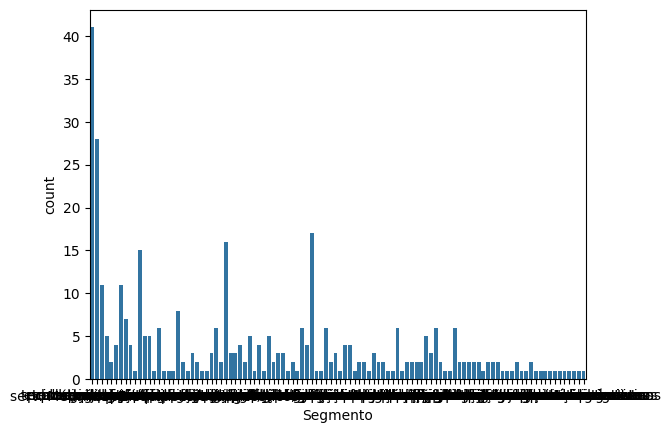

In [ ]:
sns.countplot(x = dataset['Segmento']);

In [ ]:
np.unique(dataset['Classificacao'], return_counts=True)

(array(['Boa', 'Ruim'], dtype=object), array([189, 188]))

In [ ]:
# Garantir que a coluna 'Segmento' seja do tipo string
dataset['Segmento'] = dataset['Segmento'].astype(str)

# Usar np.unique para contar os valores únicos na coluna 'Segmento'
unique_segments, counts = np.unique(dataset['Segmento'], return_counts=True)

# Exibir os segmentos únicos e suas contagens
for segment, count in zip(unique_segments, counts):
    print(f'Segmento: {segment}, Count: {count}')


Segmento: acessorios, Count: 1
Segmento: acessórios, Count: 1
Segmento: agriculltura, Count: 1
Segmento: agricultura, Count: 4
Segmento: agua e saneamento, Count: 5
Segmento: alimentos, Count: 1
Segmento: alimentos diversos, Count: 4
Segmento: aluguel de carros, Count: 3
Segmento: armas e munições, Count: 1
Segmento: artefatos de cobre, Count: 1
Segmento: artefatos de ferro e aço, Count: 6
Segmento: automoveis e motocicletas, Count: 4
Segmento: açucar e alcool, Count: 3
Segmento: bancos, Count: 28
Segmento: bicicletas, Count: 1
Segmento: brinquedos e jogos, Count: 2
Segmento: café, Count: 2
Segmento: calçados, Count: 4
Segmento: carnes e derivados, Count: 6
Segmento: cervejas e refrigerantes, Count: 1
Segmento: compressores e outros, Count: 1
Segmento: computadores e equipamentos, Count: 2
Segmento: construção civil, Count: 2
Segmento: construção pesada, Count: 4
Segmento: corretoras de seguros, Count: 1
Segmento: corretoras e seguros, Count: 1
Segmento: edificações, Count: 17
Segmento

In [ ]:
def corrige_segmento(texto):
  segmento = ''
  if texto == 'acessórios':
    segmento = 'acessorios'
  elif texto == 'agriculltura':
    segmento = 'agricultura'
  elif texto == 'alimentos diversos':
    segmento = 'alimentos'
  elif texto == 'eletrodomésticos':
    segmento = 'eletrodomesticos'
  elif texto == 'equipamentos e servicos':
    segmento = 'equipamentos'
  elif texto == 'mateial rodoviario':
    segmento = 'material rodoviario'
  elif texto == 'ser med hospit analises e diagnosticos' or texto == 'serv med hospit analises e disgnosticos' or texto == 'serv.med.hospit.analises e diagnosticos':
    segmento = 'hospitalar'
  elif texto == 'serviços de apoio e armazenamento':
    segmento = 'serviços de apoio e armazenagem'
  elif texto == 'serviços diversos s.a ctax':
    segmento = 'serviços diversos'
  elif texto == 'siderurgia':
    segmento = 'siderurgica'
  elif texto == 'soc. Credito e financiamento' or texto == 'soc credito e financiamento':
    segmento = 'credito'
  elif texto == 'tansporte aereo':
    segmento = 'transporte aereo'
  else:
    segmento = texto

  return segmento

In [ ]:
dataset['Segmento'] = dataset['Segmento'].apply(corrige_segmento)

In [ ]:
np.unique(dataset['Segmento'], return_counts=True)

(array(['acessorios', 'agricultura', 'agua e saneamento', 'alimentos',
        'aluguel de carros', 'armas e munições', 'artefatos de cobre',
        'artefatos de ferro e aço', 'automoveis e motocicletas',
        'açucar e alcool', 'bancos', 'bicicletas', 'brinquedos e jogos',
        'café', 'calçados', 'carnes e derivados',
        'cervejas e refrigerantes', 'compressores e outros',
        'computadores e equipamentos', 'construção civil',
        'construção pesada', 'corretoras de seguros',
        'corretoras e seguros', 'credito', 'edificações',
        'eletrodomesticos', 'embalagens', 'energia eletrica',
        'engenharia construtiva', 'engenharia consultiva', 'equipamentos',
        'equipamentos e serviços', 'exploração de imoveis',
        'exploração de rodovias', 'exploração, refino e distribuição',
        'exploração. Refino e distribuição', 'fertilizantes e defensivos',
        'fios e tecidos', 'gas', 'gestão de recursos e investimentos',
        'holdings divers

In [ ]:
dataset.describe()

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,Divida Liquida,EM,Score
count,3.770000e+02,3.770000e+02,3.770000e+02,377.000000,377.000000,377.000000,377.000000,3.770000e+02,377.000000,377.000000,377.000000,377.000000,377.000000
mean,8.596999e+09,1.021776e+10,3.094127e+04,-8.723009,37.412006,12.338617,1.677604,-7.975951e+03,307.596923,1.720811,2080.015076,62.646871,8.878866
std,2.607386e+10,3.298080e+10,2.243273e+05,61.857041,808.481974,79.811676,3.025333,7.522024e+04,1623.298086,4.207898,11156.897804,414.394067,0.193638
min,6.750600e+04,-2.623695e+07,1.000000e+00,-806.660000,-3804.860000,-312.210000,-15.600000,-1.079664e+06,-2494.000000,0.000000,-8882.000000,1.010000,8.526321
25%,2.074869e+08,4.447467e+08,5.700000e+02,-8.723009,3.100000,-0.480000,0.490000,-1.565000e+03,-7.000000,0.480000,24.000000,1.930000,8.721481
50%,1.870186e+09,4.530133e+09,1.798000e+03,0.030000,9.710000,10.810000,1.270000,-9.000000e+01,30.000000,1.070000,361.000000,3.000000,8.908723
75%,8.596999e+09,1.021776e+10,6.572000e+03,0.980000,24.940000,14.830000,1.710000,-8.000000e+00,307.596923,1.720811,2080.015076,34.000000,9.044023
max,2.866893e+11,4.998736e+11,3.628335e+06,160.780000,14896.470000,952.660000,24.760000,1.344470e+05,17415.000000,68.000000,199245.000000,6723.190000,9.357424


# Variáveis dummy

In [ ]:
y = dataset['Classificacao'].values
y

array(['Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim

In [ ]:
empresa = dataset['empresa']
empresa

,empresa
0,aes elpa s.a
1,tiet aes tiete
2,aflu afluente
3,aflu afluente t
4,rpad alfa holding
...,...
372,whirlpool s.a whrl
373,wilson sons ltd wson
374,wlm industria e comercia s.a sgas
375,zain participações s.a opzi


In [ ]:
X_cat = dataset[['Segmento', 'Classificacao','empresa']]
X_cat

,Segmento,Classificacao,empresa
0,energia eletrica,Ruim,aes elpa s.a
1,energia eletrica,Boa,tiet aes tiete
2,energia eletrica,Ruim,aflu afluente
3,energia eletrica,Ruim,aflu afluente t
4,bancos,Ruim,rpad alfa holding
...,...,...,...
372,eletrodomesticos,Boa,whirlpool s.a whrl
373,serviços de apoio e armazenagem,Boa,wilson sons ltd wson
374,material de transporte,Ruim,wlm industria e comercia s.a sgas
375,outros,Boa,zain participações s.a opzi


In [ ]:
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()
X_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
X_cat[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [ ]:
X_cat.shape

(377, 472)

In [ ]:
type(X_cat)

numpy.ndarray

In [ ]:
X_cat = pd.DataFrame(X_cat)
type(X_cat)

pandas.core.frame.DataFrame

In [ ]:
dataset_original = dataset.copy()

In [ ]:
dataset.drop(['Segmento', 'Classificacao', 'empresa'], axis = 1, inplace = True)

In [ ]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,Divida Liquida,EM,Score
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,1567.000000,3.940000,8.879021
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,2459.000000,2.400000,9.094865
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,-8.000000,1.240000,8.662547
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,-31.000000,1.150000,8.746217
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,-440.750000,1.010000,8.748190
...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,-421.000000,2.630000,8.996471
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,478.000000,2.130000,9.044023
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,-135.000000,1.180000,8.691718
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,-2.000000,62.646871,9.044022


In [ ]:
dataset.index

RangeIndex(start=0, stop=377, step=1)

In [ ]:
X_cat.index

RangeIndex(start=0, stop=377, step=1)

In [ ]:
dataset.index = X_cat.index

In [ ]:
dataset.index, X_cat.index

(RangeIndex(start=0, stop=377, step=1), RangeIndex(start=0, stop=377, step=1))

In [ ]:
dataset = pd.concat([dataset, X_cat], axis = 1)
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,...,462,463,464,465,466,467,468,469,470,471
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# Normalização

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# 1. Assumindo que o 'dataset' já está carregado no ambiente

# 2. Garantir que todos os nomes das colunas sejam strings
dataset.columns = dataset.columns.astype(str)

# 3. Separar as colunas numéricas do dataset já carregado
numerical_columns = dataset.select_dtypes(include=[np.number]).columns
numerical_data = dataset[numerical_columns]

# 4. Aplicar o MinMaxScaler apenas nas colunas numéricas
scaler = MinMaxScaler()
dataset_normalizado = pd.DataFrame(scaler.fit_transform(numerical_data), columns=numerical_columns)

# 5. Manter as colunas não numéricas no dataset original (se existirem)
non_numerical_columns = dataset.select_dtypes(exclude=[np.number]).columns
dataset_final = pd.concat([dataset_normalizado, dataset[non_numerical_columns]], axis=1)

# 6. Exibir as primeiras linhas do dataset final, com as colunas normalizadas e não numéricas mantidas
print(dataset_final.head())


   Valor de M.        EV  Pes. Fisicas  LPA descontado       VPA  \
0     0.004655  0.008838      0.004401        0.834388  0.205381   
1     0.052986  0.020492      0.005148        0.833995  0.203497   
2     0.000330  0.000224      0.000523        0.833964  0.203565   
3     0.000983  0.000541      0.000002        0.834016  0.203520   
4     0.001007  0.000624      0.003111        0.834429  0.204011   

   P/L descontado     P/VPA  Margem segurança  Luc. Liquido  Divida Bruta/PL  \
0        0.266367  0.395937          0.889263      0.153147         0.012647   
1        0.258627  0.470515          0.889281      0.160581         0.025294   
2        0.271775  0.446482          0.889211      0.125923         0.025306   
3        0.263980  0.475966          0.889301      0.126124         0.000588   
4        0.251299  0.394450          0.889359      0.127530         0.003676   

   ...  462  463  464  465  466  467  468  469  470  471  
0  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dataset_normalizado = scaler.fit_transform(dataset)

In [ ]:
dataset_normalizado

array([[4.65507421e-03, 8.83755803e-03, 4.40091789e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 5.14836837e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 5.22829486e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 9.93017732e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 2.75608585e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
dataset_normalizado[0]

array([4.65507421e-03, 8.83755803e-03, 4.40091789e-03, 8.34387662e-01,
       2.05380580e-01, 2.66367295e-01, 3.95936571e-01, 8.89262572e-01,
       1.53146818e-01, 1.26470588e-02, 5.02049230e-02, 4.35870506e-04,
       4.24375980e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
      

In [ ]:
X = dataset_normalizado.copy()
X

array([[4.65507421e-03, 8.83755803e-03, 4.40091789e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 5.14836837e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 5.22829486e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 9.93017732e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 2.75608585e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
X.shape

(377, 485)

In [ ]:
y

array(['Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim

#Avaliação e aplicação dos algoritmos

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
(347 + 2 ) / 2

174.5

In [ ]:
resultados_forest = []
resultados_neural = []
for i in range(30):
  kfold = KFold(n_splits=10, shuffle=True, random_state=i)

  random_forest = RandomForestClassifier()
  scores = cross_val_score(random_forest, X, y, cv = kfold)
  resultados_forest.append(scores.mean())

  network = MLPClassifier(hidden_layer_sizes=(175, 175))
  scores = cross_val_score(network, X, y, cv = kfold)
  resultados_neural.append(scores.mean())

resultados_forest = np.array(resultados_forest)
resultados_neural = np.array(resultados_neural)

In [ ]:
resultados_forest.mean(), resultados_neural.mean()

(1.0, 1.0)

In [ ]:
resultados_forest

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
resultados_neural

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

# Avaliação com base de treinamento e teste

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

In [ ]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_treinamento.shape, y_treinamento.shape

((301, 485), (301,))

In [ ]:
X_teste.shape, y_teste.shape

((76, 485), (76,))

In [ ]:
random_forest = RandomForestClassifier()
random_forest.fit(X_treinamento, y_treinamento)

RandomForestClassifier()

In [ ]:
previsoes = random_forest.predict(X_teste)

In [ ]:
previsoes

array(['Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa',
       'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Ruim'], dtype=object)

In [ ]:
y_teste

array(['Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa',
       'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Ruim'], dtype=object)

In [ ]:
accuracy_score(y_teste, previsoes)

1.0

In [ ]:
cm = confusion_matrix(y_teste, previsoes)
cm

array([[37,  0],
       [ 0, 39]])

In [ ]:
random_forest.classes_

array(['Boa', 'Ruim'], dtype=object)

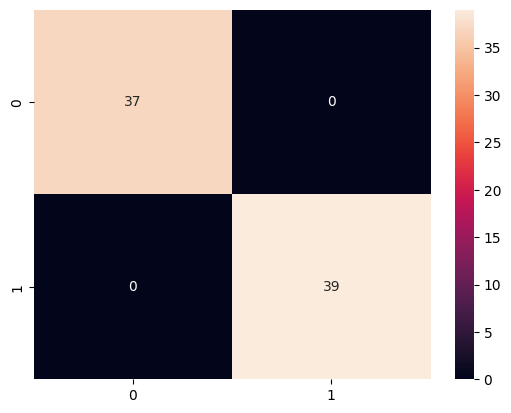

In [ ]:
sns.heatmap(cm, annot=True);

In [ ]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Boa       1.00      1.00      1.00        37
        Ruim       1.00      1.00      1.00        39

    accuracy                           1.00        76
   macro avg       1.00      1.00      1.00        76
weighted avg       1.00      1.00      1.00        76



In [ ]:
X_teste[0].shape

(485,)

In [ ]:
X_teste[0].reshape(1, -1)

array([[6.59720363e-04, 5.16981901e-04, 4.26366481e-04, 8.32878525e-01,
        2.04241623e-01, 2.39716334e-01, 3.99900892e-01, 8.89076040e-01,
        1.25169521e-01, 1.02941176e-03, 4.26854757e-02, 7.88434704e-05,
        2.26061431e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
for nome, importancia in zip(dataset.columns, random_forest.feature_importances_):
  print(nome, ' = ', importancia)

Valor de M.  =  0.18756712502463138
EV  =  0.10856860964309757
Pes. Fisicas  =  0.012139448421434914
LPA descontado  =  0.007258794127581287
VPA  =  0.007099792725722209
P/L descontado  =  0.038592992355769
P/VPA  =  0.03273628696673602
Margem segurança  =  0.012558002972452555
Luc. Liquido  =  0.04244282051621891
Divida Bruta/PL  =  0.004820659176549151
Divida Liquida  =  0.0215733250174293
EM  =  0.006372525342496771
Score  =  0.13779155046277858
0  =  0.0
1  =  0.00013264569888053485
2  =  0.00021074881912058768
3  =  0.0005320416887564815
4  =  0.0
5  =  0.0
6  =  0.0
7  =  0.000566037175171267
8  =  0.00016737563475179254
9  =  0.0007189860147283609
10  =  0.000943054477826428
11  =  9.187228894610673e-06
12  =  0.00017574058182678588
13  =  0.0
14  =  0.00010092587608300546
15  =  3.6898117112812146e-06
16  =  0.0
17  =  0.0
18  =  0.00028676848394707807
19  =  0.0
20  =  0.0002973544033242034
21  =  2.3736972266383796e-06
22  =  0.00015402805199262395
23  =  0.000222272502365624

In [ ]:
caracteristicas = dataset.columns
caracteristicas

Index(['Valor de M.', 'EV', 'Pes. Fisicas', 'LPA descontado', 'VPA',
       'P/L descontado', 'P/VPA', 'Margem segurança', 'Luc. Liquido',
       'Divida Bruta/PL',
       ...
       '462', '463', '464', '465', '466', '467', '468', '469', '470', '471'],
      dtype='object', length=485)

In [ ]:
importancias = random_forest.feature_importances_
importancias

array([1.87567125e-01, 1.08568610e-01, 1.21394484e-02, 7.25879413e-03,
       7.09979273e-03, 3.85929924e-02, 3.27362870e-02, 1.25580030e-02,
       4.24428205e-02, 4.82065918e-03, 2.15733250e-02, 6.37252534e-03,
       1.37791550e-01, 0.00000000e+00, 1.32645699e-04, 2.10748819e-04,
       5.32041689e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.66037175e-04, 1.67375635e-04, 7.18986015e-04, 9.43054478e-04,
       9.18722889e-06, 1.75740582e-04, 0.00000000e+00, 1.00925876e-04,
       3.68981171e-06, 0.00000000e+00, 0.00000000e+00, 2.86768484e-04,
       0.00000000e+00, 2.97354403e-04, 2.37369723e-06, 1.54028052e-04,
       2.22272502e-04, 1.68854950e-03, 6.04133175e-05, 1.74136355e-04,
       3.56634337e-03, 8.52972993e-05, 0.00000000e+00, 0.00000000e+00,
       1.39967196e-04, 8.15073619e-04, 0.00000000e+00, 9.94364065e-05,
       0.00000000e+00, 5.61844019e-04, 1.08167132e-03, 1.93026292e-04,
       3.05340006e-04, 5.62039105e-04, 8.88921240e-04, 0.00000000e+00,
      

In [ ]:
indices = np.argsort(importancias)
indices

array([484, 206, 207, 395, 213, 214, 215, 216, 217, 218, 222, 223, 224,
       226, 227, 228, 229, 230, 233, 234, 235, 237, 392, 239, 391, 241,
       390, 244, 247, 385, 202, 201, 200, 198, 139, 145, 407, 148, 150,
       151, 152, 154, 157, 158, 161, 163, 166, 167, 251, 168, 172, 175,
       176, 178, 401, 363, 399, 186, 187, 189, 190, 193, 195, 197, 171,
       253, 254, 255, 308, 309, 312, 313, 314, 315, 316, 318, 374, 320,
       322, 324, 372, 371, 307, 332, 369, 336, 340, 343, 345, 347, 348,
       366, 352, 356, 357, 358, 359, 361, 370, 137, 306, 304, 257, 258,
       259, 261, 263, 264, 266, 267, 383, 269, 270, 271, 272, 277, 305,
       278, 281, 381, 283, 284, 287, 289, 290, 380, 292, 379, 378, 299,
       300, 376, 382, 135, 182, 410, 446, 445,  55,  58, 442, 441,  62,
        63,  65,  66, 439,  71,  72, 438, 434,  82, 433, 432, 431,  86,
        89,  90, 429,  94, 422, 449, 421, 450,  46, 480, 479, 478, 477,
       475,  13, 468, 466,  17,  18,  19, 465, 463, 462, 461,  2

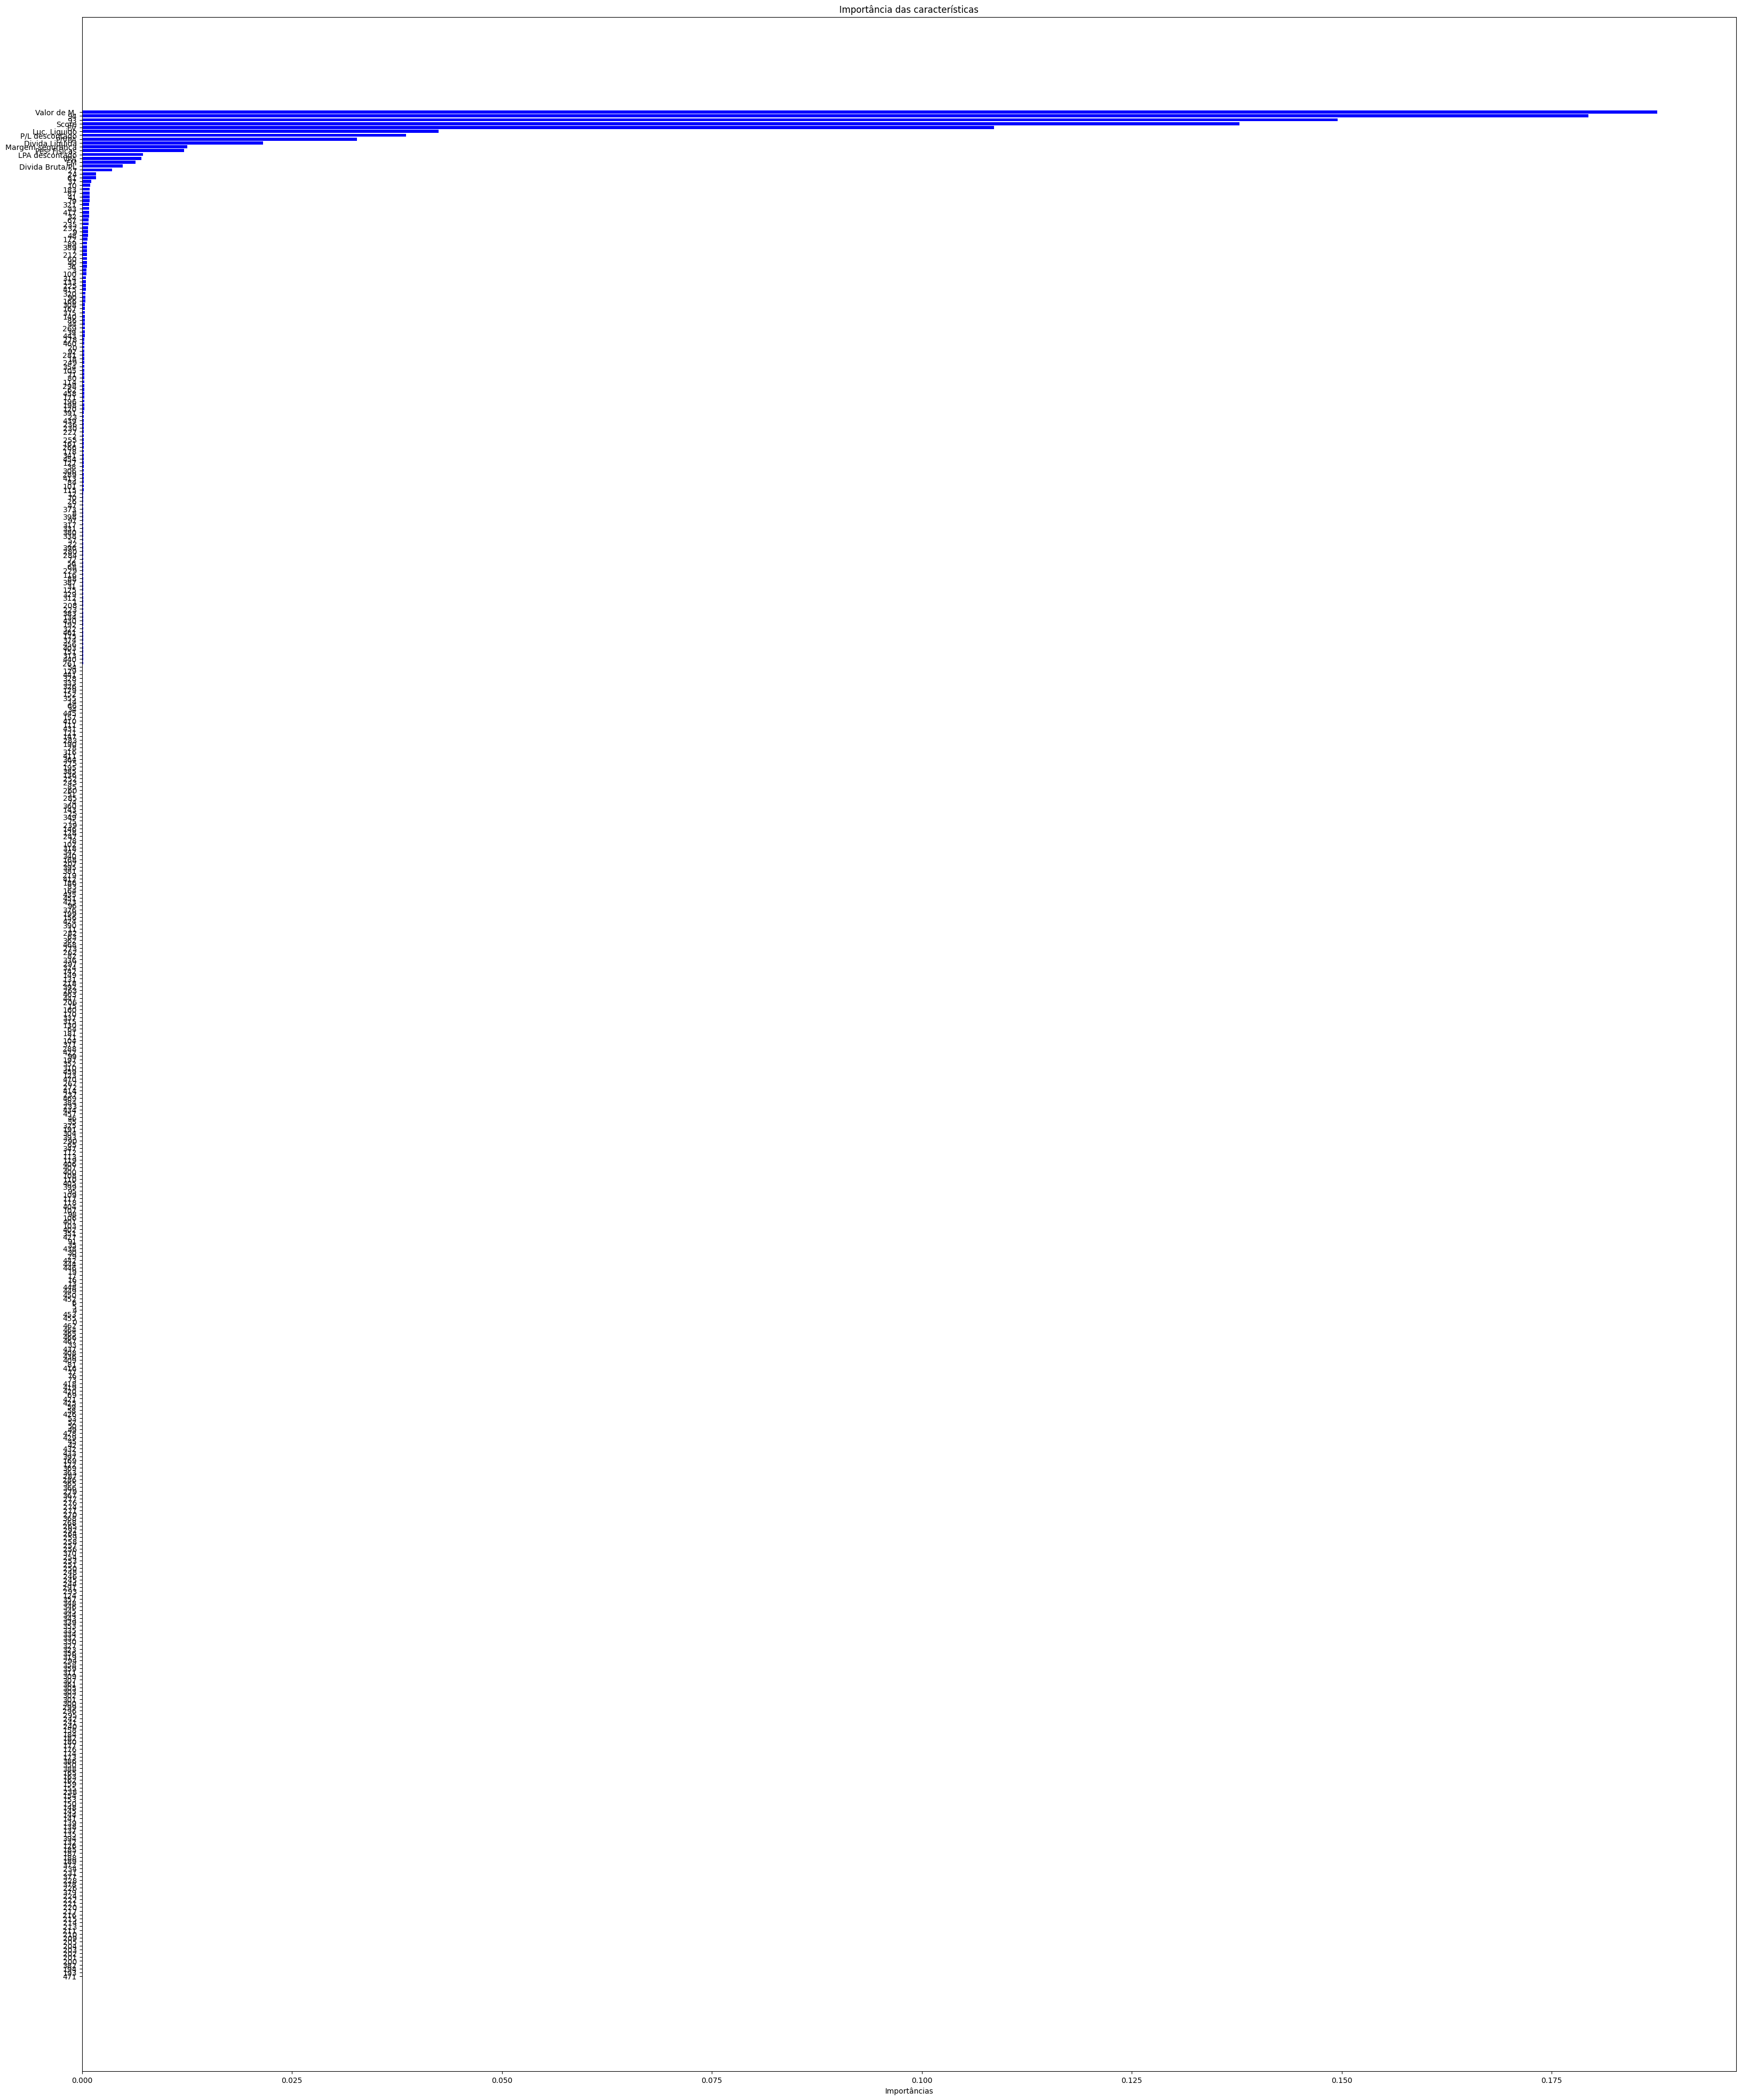

In [ ]:
plt.figure(figsize=(40,50))
plt.title('Importância das características')
plt.barh(range(len(indices)), importancias[indices], color = 'b', align = 'center')
plt.yticks(range(len(indices)), [caracteristicas[i] for i in indices])
plt.xlabel('Importâncias')
plt.show();

#Agrupamento de empresas

In [ ]:
import pickle

In [ ]:
with open('bases_classificacao.pkl', 'wb') as f:
  pickle.dump([dataset, dataset_original, X, y, empresa, scaler], f)

In [ ]:
random_forest

RandomForestClassifier()

In [ ]:
parametros = {'criterion': ['gini', 'entropy'],
              'min_samples_split': [2, 4, 6],
              'n_estimators': [50, 100, 150]}

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = parametros)
grid_search.fit(X, y)
best_params = grid_search.best_params_
best_score = grid_search.best_score_
print(best_params, best_score)

{'criterion': 'gini', 'min_samples_split': 2, 'n_estimators': 50} 1.0


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


In [ ]:
import pickle
with open('bases_classificacao.pkl', 'rb') as f:
  dataset, dataset_original, X, y, empresa, scaler = pickle.load(f)

In [ ]:
dataset

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,...,462,463,464,465,466,467,468,469,470,471
0,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
373,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
374,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
375,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
dataset_original

,empresa,Segmento,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,Divida Liquida,EM,Score,Classificacao
0,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,1567.000000,3.940000,8.879021,Ruim
1,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,2459.000000,2.400000,9.094865,Boa
2,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,-8.000000,1.240000,8.662547,Ruim
3,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,-31.000000,1.150000,8.746217,Ruim
4,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,-440.750000,1.010000,8.748190,Ruim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,-421.000000,2.630000,8.996471,Boa
373,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,478.000000,2.130000,9.044023,Boa
374,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,-135.000000,1.180000,8.691718,Ruim
375,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,-2.000000,62.646871,9.044022,Boa


In [ ]:
X

array([[4.65507421e-03, 8.83755803e-03, 4.40091789e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [5.29860701e-02, 2.04920889e-02, 5.14836837e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [3.29924090e-04, 2.23825112e-04, 5.22829486e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.92594055e-04, 2.43100428e-04, 9.93017732e-04, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 2.75608585e-07, ...,
        0.00000000e+00, 0.00000000e+00, 1.00000000e+00],
       [2.99869364e-02, 2.04920889e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [ ]:
y

array(['Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Ruim', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Ruim',
       'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa',
       'Boa', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Boa', 'Ruim', 'Boa',
       'Boa', 'Boa', 'Ruim', 'Boa', 'Ruim', 'Boa', 'Boa', 'Boa', 'Ruim',
       'Boa', 'Ruim', 'Ruim', 'Boa', 'Boa', 'Ruim', 'Boa', 'Boa', 'Ruim',
       'Ruim', 'Ruim', 'Ruim', 'Ruim', 'Ruim

In [ ]:
empresa

,empresa
0,aes elpa s.a
1,tiet aes tiete
2,aflu afluente
3,aflu afluente t
4,rpad alfa holding
...,...
372,whirlpool s.a whrl
373,wilson sons ltd wson
374,wlm industria e comercia s.a sgas
375,zain participações s.a opzi


In [ ]:
scaler

MinMaxScaler()

Obtenção do número de clusters

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
wcss = [] # within cluster sum of squares
faixa = range(1, 21)
for i in faixa:
  #print(i)
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

In [ ]:
print(wcss)

[970.0976923337306, 762.5494657641864, 745.968019686312, 737.5907898801916, 737.1473602595293, 707.0822165588606, 710.3340807116209, 694.860611979149, 676.1379415013754, 673.6125108436577, 680.8853851554727, 646.5044343776879, 661.0402871767121, 633.6140875455221, 636.5503580303941, 633.1668867008665, 620.3839359631386, 639.1132433580045, 608.2299249678339, 620.4036036002756]


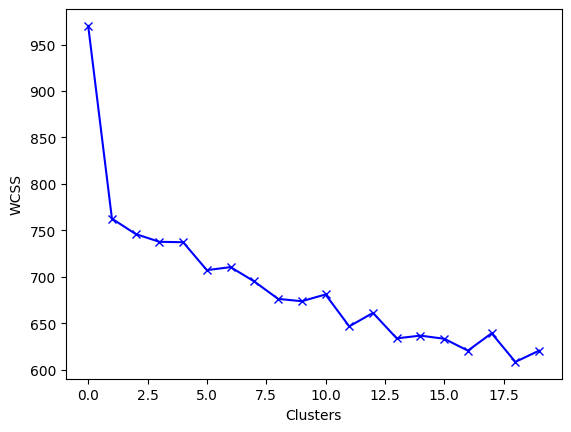

In [ ]:
import matplotlib.pyplot as plt
plt.plot(wcss, 'bx-')
plt.xlabel('Clusters')
plt.ylabel('WCSS');

Agrupamento com k-means

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X)

KMeans(n_clusters=6)

In [ ]:
labels = kmeans.labels_
labels, len(labels)

(array([4, 1, 4, 4, 4, 3, 3, 5, 3, 1, 3, 3, 5, 3, 0, 3, 1, 3, 2, 3, 5, 4,
        0, 5, 0, 3, 4, 4, 3, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 4, 3, 4, 0,
        2, 3, 0, 3, 3, 3, 2, 0, 2, 3, 2, 4, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 5, 3, 2, 5, 5, 1, 4, 1, 5, 1, 3, 3, 3, 4, 5, 0, 1, 4, 1, 4,
        1, 1, 1, 4, 4, 2, 0, 3, 5, 3, 3, 3, 0, 1, 5, 3, 3, 3, 2, 3, 0, 0,
        3, 3, 5, 3, 3, 4, 2, 5, 5, 2, 5, 3, 3, 3, 1, 1, 2, 2, 2, 1, 3, 2,
        0, 2, 3, 3, 3, 3, 0, 3, 3, 2, 5, 0, 2, 3, 1, 3, 1, 3, 1, 0, 0, 1,
        4, 3, 1, 4, 3, 0, 1, 1, 3, 5, 2, 2, 0, 3, 4, 1, 0, 3, 2, 0, 3, 5,
        3, 3, 0, 2, 3, 2, 2, 3, 3, 3, 0, 2, 3, 3, 3, 2, 5, 2, 5, 3, 0, 3,
        0, 5, 3, 5, 0, 0, 3, 0, 3, 3, 3, 3, 0, 2, 3, 3, 2, 0, 2, 2, 0, 2,
        3, 0, 0, 3, 3, 1, 3, 0, 3, 5, 3, 2, 5, 3, 3, 3, 3, 2, 3, 5, 5, 3,
        3, 3, 2, 5, 0, 0, 5, 5, 3, 5, 0, 2, 3, 3, 5, 5, 3, 3, 3, 3, 3, 5,
        3, 3, 0, 3, 1, 3, 0, 5, 3, 3, 3, 5, 3, 2, 2, 3, 5, 4, 2, 2, 3, 0,
        5, 3, 3, 5, 3, 0, 2, 0, 3, 2, 

In [ ]:
import numpy as np
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 52,  28,  63, 161,  26,  47]))

In [ ]:
kmeans.cluster_centers_

array([[ 5.28682348e-04,  1.54184331e-03,  1.20312158e-03, ...,
        -2.16840434e-18,  1.92307692e-02, -2.16840434e-18],
       [ 3.18432854e-02,  2.58178678e-02,  4.41794920e-03, ...,
        -8.67361738e-19, -8.67361738e-19, -8.67361738e-19],
       [ 2.53324767e-03,  3.09893427e-03,  6.45768414e-04, ...,
        -4.33680869e-19, -4.33680869e-19, -4.33680869e-19],
       [ 6.31133127e-02,  3.94471351e-02,  1.77240822e-02, ...,
         6.21118012e-03,  4.33680869e-18,  6.21118012e-03],
       [ 2.15424527e-03,  1.16691518e-02,  1.56929408e-03, ...,
        -8.67361738e-19, -8.67361738e-19, -8.67361738e-19],
       [ 1.94111197e-04,  1.54940066e-03,  1.98944560e-03, ...,
        -3.03576608e-18, -3.03576608e-18, -3.03576608e-18]])

In [ ]:
dataset.columns

Index(['Valor de M.', 'EV', 'Pes. Fisicas', 'LPA descontado', 'VPA',
       'P/L descontado', 'P/VPA', 'Margem segurança', 'Luc. Liquido',
       'Divida Bruta/PL',
       ...
       '462', '463', '464', '465', '466', '467', '468', '469', '470', '471'],
      dtype='object', length=485)

In [ ]:
import pandas as pd
centroides = pd.DataFrame(data = kmeans.cluster_centers_, columns = [dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,...,462,463,464,465,466,467,468,469,470,471
0,0.000529,0.001542,0.001203,0.822372,0.201707,0.245241,0.395096,0.887276,0.125288,0.020682,...,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,1.923077e-02,-2.168404e-18
1,0.031843,0.025818,0.004418,0.834447,0.204494,0.249642,0.428249,0.888321,0.140753,0.016366,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19
2,0.002533,0.003099,0.000646,0.830061,0.204006,0.245470,0.425161,0.886384,0.126040,0.024973,...,-4.336809e-19,1.587302e-02,1.587302e-02,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19
3,0.063113,0.039447,0.017724,0.831492,0.204904,0.268203,0.450673,0.886822,0.158628,0.025321,...,6.211180e-03,4.336809e-18,4.336809e-18,6.211180e-03,6.211180e-03,4.336809e-18,6.211180e-03,6.211180e-03,4.336809e-18,6.211180e-03
4,0.002154,0.011669,0.001569,0.834957,0.204501,0.252629,0.406095,0.885587,0.127994,0.020770,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19
5,0.000194,0.001549,0.001989,0.786082,0.214526,0.250574,0.403214,0.853582,0.123147,0.038652,...,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18,2.127660e-02,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18


In [ ]:
scaler

MinMaxScaler()

In [ ]:
centroides = scaler.inverse_transform(centroides)
centroides = pd.DataFrame(data = centroides, columns=[dataset.columns])
centroides

,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,...,462,463,464,465,466,467,468,469,470,471
0,1.516350e+08,7.445303e+08,4366.326923,-11.064673,-32.680000,-2.012334,0.346062,-2412.933654,0.365385,1.406372,...,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,-2.168404e-18,1.923077e-02,-2.168404e-18
1,9.129195e+09,1.288011e+10,16030.795291,0.616928,19.458358,3.554187,1.684115,-1143.668049,308.249451,1.112857,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19
2,7.263223e+08,1.522920e+09,2344.063492,-3.625715,10.330032,-1.721971,1.559486,-3495.375418,15.323614,1.698147,...,-4.336809e-19,1.587302e-02,1.587302e-02,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19,-4.336809e-19
3,1.809398e+10,1.969338e+10,64309.890003,-2.240972,27.126150,27.031710,2.589149,-2963.510673,664.133378,1.721858,...,6.211180e-03,4.336809e-18,4.336809e-18,6.211180e-03,6.211180e-03,4.336809e-18,6.211180e-03,6.211180e-03,4.336809e-18,6.211180e-03
4,6.176664e+08,5.807171e+09,5694.923077,1.110385,19.576923,7.333408,0.790000,-4462.558846,54.230769,1.412328,...,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19,-8.673617e-19
5,5.571710e+07,7.483082e+08,7219.373113,-46.173171,207.058511,4.733895,0.673737,-43320.808511,-42.272471,2.628327,...,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18,2.127660e-02,-3.035766e-18,-3.035766e-18,-3.035766e-18,-3.035766e-18


In [ ]:
dataset_cluster = pd.concat([empresa, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

,empresa,cluster
0,aes elpa s.a,4
1,tiet aes tiete,1
2,aflu afluente,4
3,aflu afluente t,4
4,rpad alfa holding,4
...,...,...
372,whirlpool s.a whrl,3
373,wilson sons ltd wson,3
374,wlm industria e comercia s.a sgas,0
375,zain participações s.a opzi,3


In [ ]:
dataset_cluster = pd.concat([dataset_original, pd.DataFrame({'cluster': labels})], axis = 1)
dataset_cluster

,empresa,Segmento,Valor de M.,EV,Pes. Fisicas,LPA descontado,VPA,P/L descontado,P/VPA,Margem segurança,Luc. Liquido,Divida Bruta/PL,Divida Liquida,EM,Score,Classificacao,cluster
0,aes elpa s.a,energia eletrica,1.334627e+09,4.391657e+09,15969.000000,0.560000,36.030000,24.710000,0.380000,-0.53000,555.000000,0.860000,1567.000000,3.940000,8.879021,Ruim,4
1,tiet aes tiete,energia eletrica,1.519060e+10,1.021776e+10,18681.000000,0.180000,0.800000,14.920000,3.390000,22.00000,703.000000,1.720000,2459.000000,2.400000,9.094865,Boa,1
2,aflu afluente,energia eletrica,9.465319e+07,8.565319e+07,1898.000000,0.150000,2.070000,31.550000,2.420000,-63.00000,13.000000,1.720811,-8.000000,1.240000,8.662547,Ruim,4
3,aflu afluente t,energia eletrica,2.819886e+08,2.439886e+08,8.000000,0.200000,1.230000,21.690000,3.610000,46.00000,17.000000,0.040000,-31.000000,1.150000,8.746217,Ruim,4
4,rpad alfa holding,bancos,2.887665e+08,2.857665e+08,11290.000000,0.600000,10.420000,5.650000,0.320000,116.00000,45.000000,0.250000,-440.750000,1.010000,8.748190,Ruim,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372,whirlpool s.a whrl,eletrodomesticos,5.034333e+09,4.615333e+09,30941.268156,0.210000,1.690000,15.640000,1.940000,26.00000,307.596923,0.090000,-421.000000,2.630000,8.996471,Boa,3
373,wilson sons ltd wson,serviços de apoio e armazenagem,8.596999e+09,1.021776e+10,176.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,109.000000,0.740000,478.000000,2.130000,9.044023,Boa,3
374,wlm industria e comercia s.a sgas,material de transporte,1.412889e+08,9.528892e+07,3604.000000,-0.520000,11.610000,-7.350000,0.330000,-271.00000,21.000000,1.720811,-135.000000,1.180000,8.691718,Ruim,0
375,zain participações s.a opzi,outros,8.596999e+09,1.021776e+10,2.000000,-8.723009,37.412006,12.338617,1.677604,-7975.95134,-8.000000,1.720811,-2.000000,62.646871,9.044022,Boa,3


In [ ]:
categoria_cluster = dataset_cluster.groupby(['Segmento', 'cluster'])['cluster'].count()
categoria_cluster

Segmento               cluster
acessorios             2          1
                       5          1
agricultura            0          2
                       2          1
                       3          2
                                 ..
transporte rodoviario  2          2
utensilios domesticos  0          1
                       5          1
vestuario              3          1
viagens e turismo      3          1
Name: cluster, Length: 152, dtype: int64

Visualização

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)
componentes = pca.fit_transform(X)
componentes

array([[ 0.61834976,  0.93776453],
       [-0.80745833,  0.85254905],
       [ 0.69058064,  0.94123405],
       [ 0.66180548,  0.94013118],
       [ 0.7178353 , -0.28327448],
       [-0.69823227, -0.14498506],
       [-0.73270554, -0.12983246],
       [ 0.78615335, -0.03104645],
       [-0.70780619, -0.12260195],
       [-0.76806988,  0.85673177],
       [-0.69389426, -0.13339631],
       [-0.68586327, -0.12853713],
       [ 0.78555908, -0.03152075],
       [-0.88911414, -0.16631957],
       [ 0.73046907, -0.09061652],
       [-0.72122252, -0.12963769],
       [-0.77894829,  0.85561656],
       [-0.70724115, -0.12302437],
       [ 0.67792066, -0.03294642],
       [-0.7131014 , -0.1320627 ],
       [ 0.80932711, -0.04585067],
       [ 0.67616706, -0.28563215],
       [ 0.77165494, -0.02874554],
       [ 0.77750815, -0.04858709],
       [ 0.76450056, -0.0287921 ],
       [-0.70339577, -0.36691473],
       [ 0.70174661, -0.28443442],
       [ 0.68572129, -0.28523349],
       [-0.86143581,

In [ ]:
pca_df = pd.DataFrame(data = componentes, columns=['pca1', 'pca2'])
pca_df.head()

,pca1,pca2
0,0.618350,0.937765
1,-0.807458,0.852549
2,0.690581,0.941234
3,0.661805,0.940131
4,0.717835,-0.283274


In [ ]:
pca_df = pd.concat([pca_df, pd.DataFrame({'cluster': labels})], axis = 1)
pca_df.head()

,pca1,pca2,cluster
0,0.618350,0.937765,4
1,-0.807458,0.852549,1
2,0.690581,0.941234,4
3,0.661805,0.940131,4
4,0.717835,-0.283274,4


<Axes: xlabel='pca1', ylabel='pca2'>

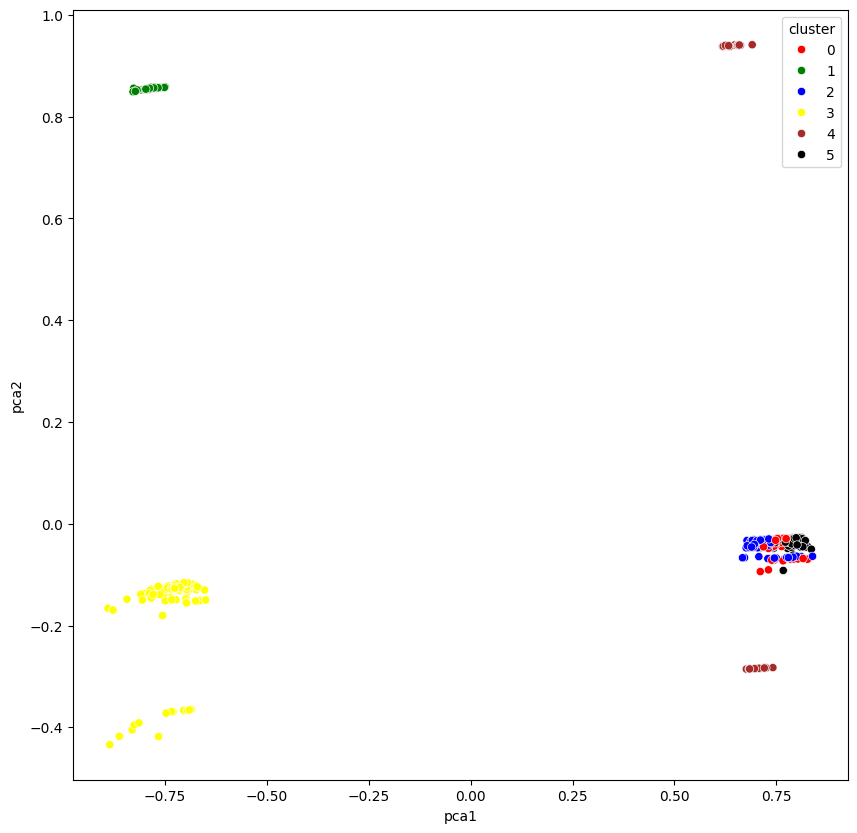

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.scatterplot(x = 'pca1', y = 'pca2', hue = 'cluster', data = pca_df, palette = ['red', 'green', 'blue', 'yellow', 'brown', 'black'])

In [ ]:
# Seleciona apenas colunas numéricas
numeric_cols = dataset_cluster.select_dtypes(include=['float64', 'int64']).columns

for i in range(6):  # Substitua pelo número de clusters
    print(f"Cluster {i} - Médias:")
    print(dataset_cluster[dataset_cluster['cluster'] == i][numeric_cols].mean())


Cluster 0 - Médias:
Valor de M.         1.516350e+08
EV                  7.445303e+08
Pes. Fisicas        4.366327e+03
LPA descontado     -1.106467e+01
VPA                -3.268000e+01
P/L descontado     -2.012334e+00
P/VPA               3.460617e-01
Margem segurança   -2.412934e+03
Luc. Liquido        3.653846e-01
Divida Bruta/PL     1.406372e+00
Divida Liquida      3.033255e+02
EM                  1.287733e+02
Score               8.677151e+00
dtype: float64
Cluster 1 - Médias:
Valor de M.         9.129195e+09
EV                  1.288011e+10
Pes. Fisicas        1.603080e+04
LPA descontado      6.169279e-01
VPA                 1.945836e+01
P/L descontado      3.554187e+00
P/VPA               1.684115e+00
Margem segurança   -1.143668e+03
Luc. Liquido        3.082495e+02
Divida Bruta/PL     1.112857e+00
Divida Liquida      3.697750e+03
EM                  2.986071e+00
Score               9.026571e+00
dtype: float64
Cluster 2 - Médias:
Valor de M.         7.263223e+08
EV                 

In [ ]:

# Importar a biblioteca necessária
import pandas as pd

# Salvar o dataset_cluster como um arquivo Excel
dataset_cluster.to_excel('dataset_cluster.xlsx', index=False)

# Exibir mensagem de sucesso
print("Arquivo dataset_cluster.xlsx foi salvo com sucesso!")


Arquivo dataset_cluster.xlsx foi salvo com sucesso!
